Projet Essentials
Code - Ophélie / Muriel / Séverine

#  1 - IMPORT LIBRAIRIES AND DATA #

In [232]:
# Import librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, f1_score

In [178]:
# Import data and remove ID column
smoking = pd.read_csv("data/smoking.csv")
smoking = smoking.drop(columns = 'ID')
smoking.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [179]:
# Rename columns with special caracters or spaces
smoking.rename(columns = {'height(cm)':'height_cm',
                          'weight(kg)':'weight_kg',
                          'waist(cm)':'waist_cm',
                          'eyesight(left)':'eyesight_left',
                          'eyesight(right)':'eyesight_right',
                          'hearing(left)':'hearing_left',
                          'hearing(right)':'hearing_right',
                          'fasting blood sugar':'fasting_blood_sugar',
                          'Urine protein':'urine_protein',
                          'serum creatinine':'serum_creatinine',
                          'dental caries':'dental_caries'},
                          inplace = True)

# 2 - BASIC INFORMATIONS ABOUT DATASET #

In [180]:
# Display basic informations about dataset
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height_cm            55692 non-null  int64  
 3   weight_kg            55692 non-null  int64  
 4   waist_cm             55692 non-null  float64
 5   eyesight_left        55692 non-null  float64
 6   eyesight_right       55692 non-null  float64
 7   hearing_left         55692 non-null  float64
 8   hearing_right        55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting_blood_sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [181]:
# Check for missing values
smoking.isnull().any()

gender                 False
age                    False
height_cm              False
weight_kg              False
waist_cm               False
eyesight_left          False
eyesight_right         False
hearing_left           False
hearing_right          False
systolic               False
relaxation             False
fasting_blood_sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
urine_protein          False
serum_creatinine       False
AST                    False
ALT                    False
Gtp                    False
oral                   False
dental_caries          False
tartar                 False
smoking                False
dtype: bool

In [182]:
# Describe basic info about dataset
smoking.describe(include = 'all')

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,hemoglobin,urine_protein,serum_creatinine,AST,ALT,Gtp,oral,dental_caries,tartar,smoking
count,55692,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692,55692.000000,55692,55692.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN
freq,35401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,55692,NaN,30940,NaN
mean,NaN,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,NaN,0.213334,NaN,0.367288
std,NaN,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,NaN,0.409665,NaN,0.482070
min,NaN,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,NaN,0.000000,NaN,0.000000
25%,NaN,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,NaN,0.000000,NaN,0.000000
50%,NaN,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,NaN,0.000000,NaN,0.000000
75%,NaN,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,NaN,0.000000,NaN,1.000000


# 3 - Data visualization #

Text(0.5, 1.0, 'Matrice de corrélation des variables')

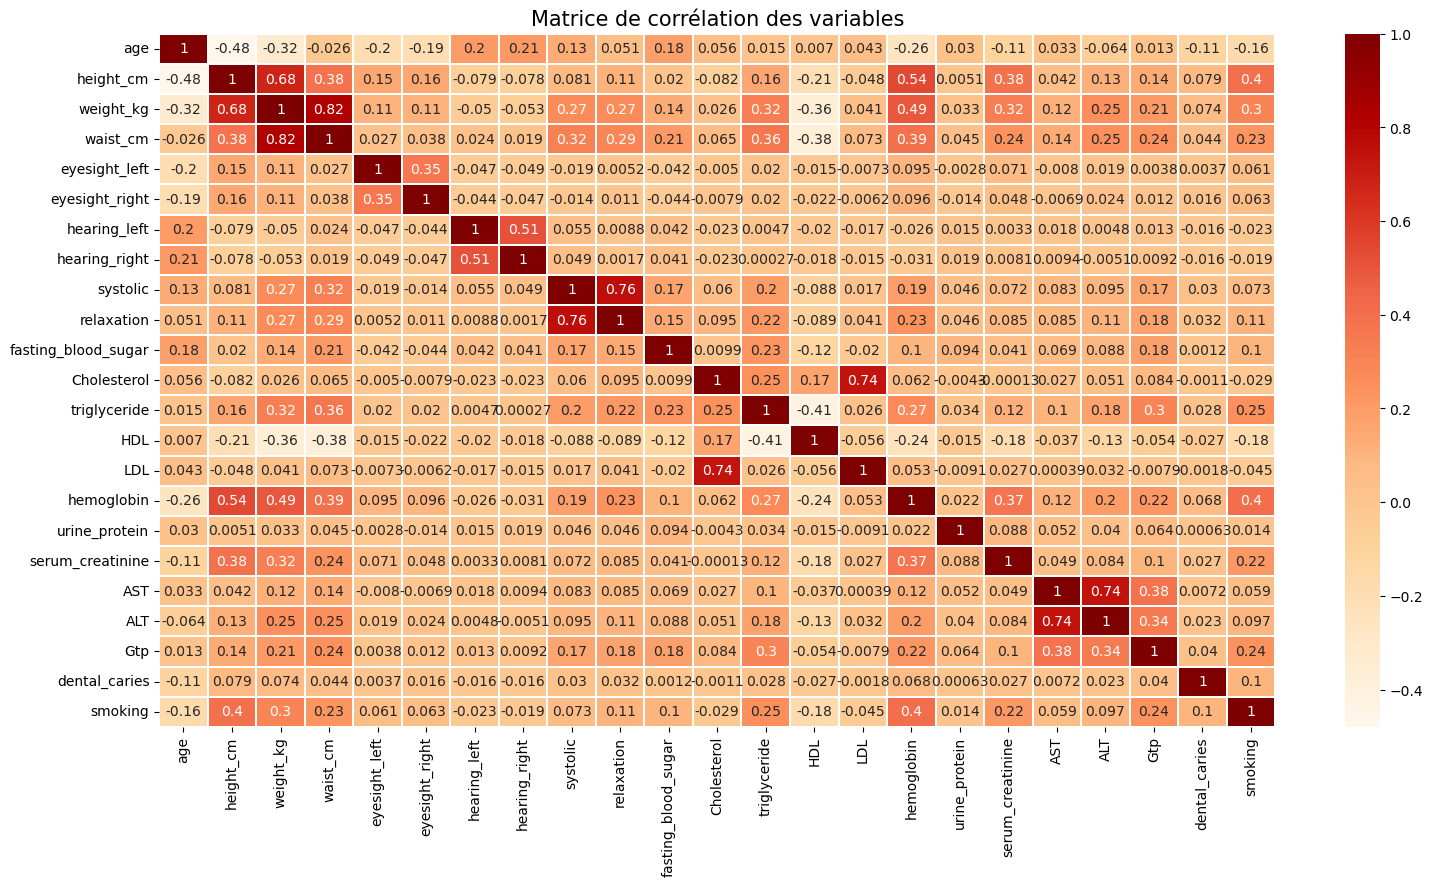

In [183]:
# Display the correlation matrix of all variables
corr_matric = smoking.corr()
plt.figure(figsize = (18, 9))
sns.heatmap(corr_matric, annot = True, linewidths = 0.2, cmap = 'OrRd')
plt.title('Matrice de corrélation des variables', fontsize = 15)

Text(0.5, 1.0, 'Répartition des individus entre\nfumeurs et non fumeurs')

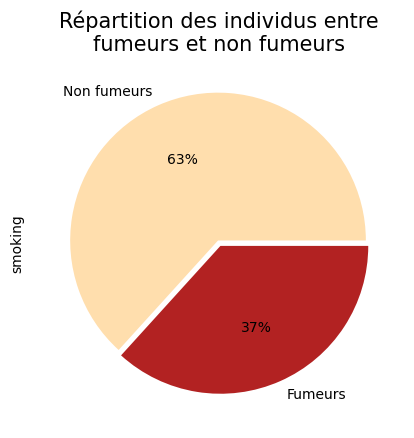

In [184]:
# Pie chart repartition for smoking / non smoking
smoking['smoking'].value_counts().plot.pie(labels = ['Non fumeurs', 'Fumeurs'], colors = ['navajowhite', 'firebrick'], autopct = '%1.0f%%', explode = (0.02, 0.02))
plt.title("Répartition des individus entre\nfumeurs et non fumeurs", fontsize = 15)

Text(0.5, 1.0, 'Répartition des individus entre\nhommes et femmes')

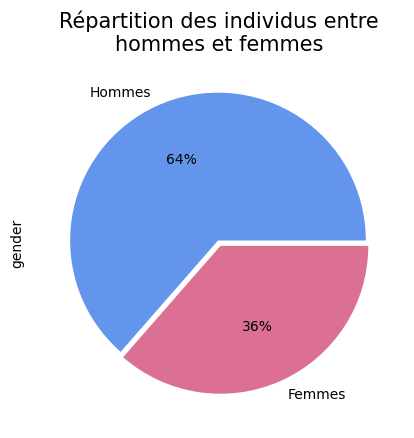

In [185]:
# Pie chart repartition for Male / Female
smoking['gender'].value_counts().plot.pie(labels = ['Hommes', 'Femmes'], colors = ['cornflowerblue', 'palevioletred'], autopct = '%1.0f%%', explode = (0.02, 0.02))
plt.title("Répartition des individus entre\nhommes et femmes", fontsize = 15)

gender  smoking
F       0          19432
        1            859
M       1          19596
        0          15805
Name: smoking, dtype: int64


Text(0.5, 0, '')

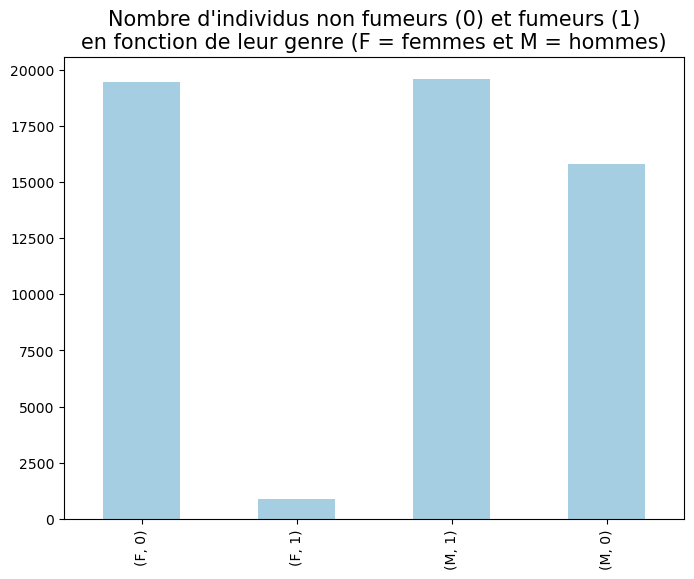

In [186]:
# Histogram of number of smoker or not smoker by gender
df = smoking.groupby('gender')['smoking'].value_counts()
print(df)

df.plot(kind = 'bar', figsize = (8,6), colormap = 'Paired')
plt.title("Nombre d'individus non fumeurs (0) et fumeurs (1)\nen fonction de leur genre (F = femmes et M = hommes)", fontsize = 15)
plt.xlabel('')

Text(0.5, 1.0, 'Répartition des individus\nselon leur genre\n et leur statut de fumeur ou non')

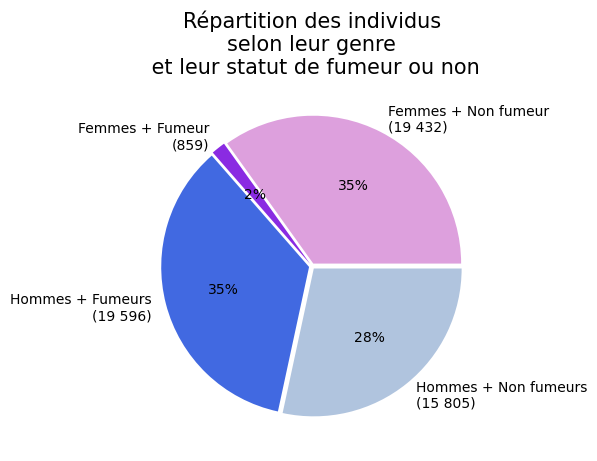

In [187]:
# Pie chart of number of smoker or not smoker by gender
df.plot.pie(ylabel = '', labels = ["Femmes + Non fumeur\n(19 432)", "Femmes + Fumeur\n(859)", "Hommes + Fumeurs\n(19 596)", "Hommes + Non fumeurs\n(15 805)"],
    colors = ['plum', 'blueviolet', 'royalblue', 'lightsteelblue'], autopct = '%1.0f%%', explode = (0.02, 0.02, 0.02, 0.02))
plt.title("Répartition des individus\nselon leur genre\n et leur statut de fumeur ou non", fontsize = 15)

# En 2020, 22,3 % de la population mondiale consommait du tabac – 36,7 % des hommes et 7,8 % des femmes de la planète
# En 2020, sur 1000 personnes, 504 sont des hommes (50,4 %) et 496, des femmes (49,6 %)

Text(0.2856404320987611, 0.5, 'Comptage')

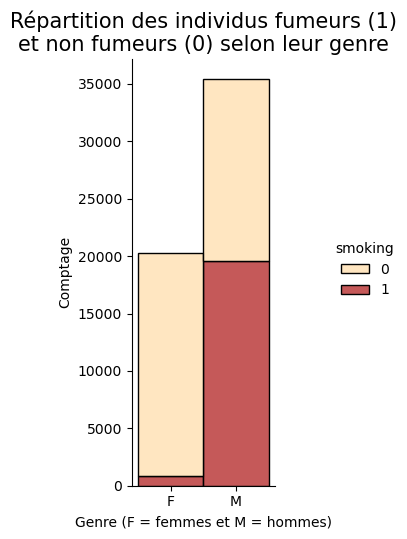

In [188]:
# Relationship between 'gender' and 'smoking'
sns.displot(
    data = smoking, x = "gender", hue = "smoking",
    kind = "hist", height = 5, aspect = 0.5, multiple = "stack",
    palette = ['navajowhite', 'firebrick'])
plt.title("Répartition des individus fumeurs (1)\net non fumeurs (0) selon leur genre", fontsize = 15);
plt.xlabel("Genre (F = femmes et M = hommes)")
plt.ylabel("Comptage")

                  age  height_cm  weight_kg
smoking gender                             
0       F       48.92     155.60      56.11
        M       41.70     169.58      71.26
1       F       46.39     156.65      56.45
        M       41.40     170.00      71.60


C:\Users\Ophélie\AppData\Local\Temp\ipykernel_4276\91768671.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = smoking.groupby(['smoking', 'gender'])['age', 'height_cm', 'weight_kg'].mean().round(2)


Text(0.5, 0, '')

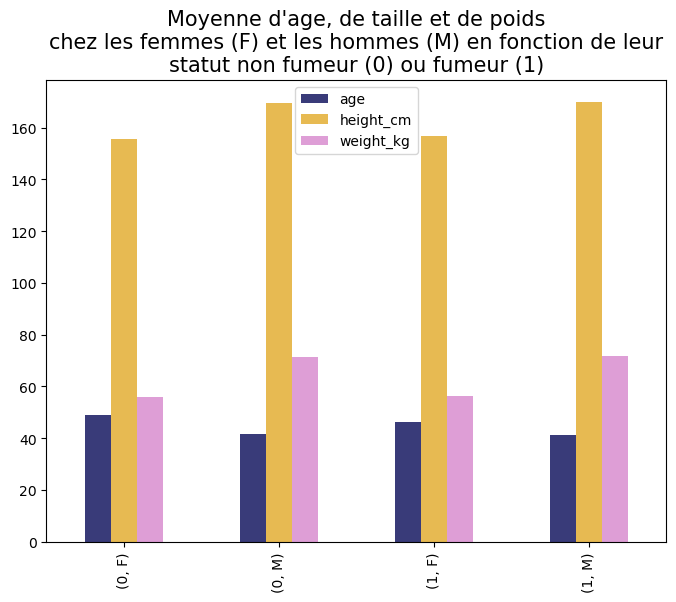

In [189]:
# Histogram of average age, height and weight by sex and smoker or non-smoker category
df = smoking.groupby(['smoking', 'gender'])['age', 'height_cm', 'weight_kg'].mean().round(2)
print(df)

df.plot(kind = 'bar', figsize = (8,6), colormap = 'tab20b')
plt.title("Moyenne d'age, de taille et de poids\nchez les femmes (F) et les hommes (M) en fonction de leur\nstatut non fumeur (0) ou fumeur (1)", fontsize = 15)
plt.xlabel('')

Text(0.5, 1.0, 'Niveau de triglycérides par genre\net statut de fumeur ou non fumeur')

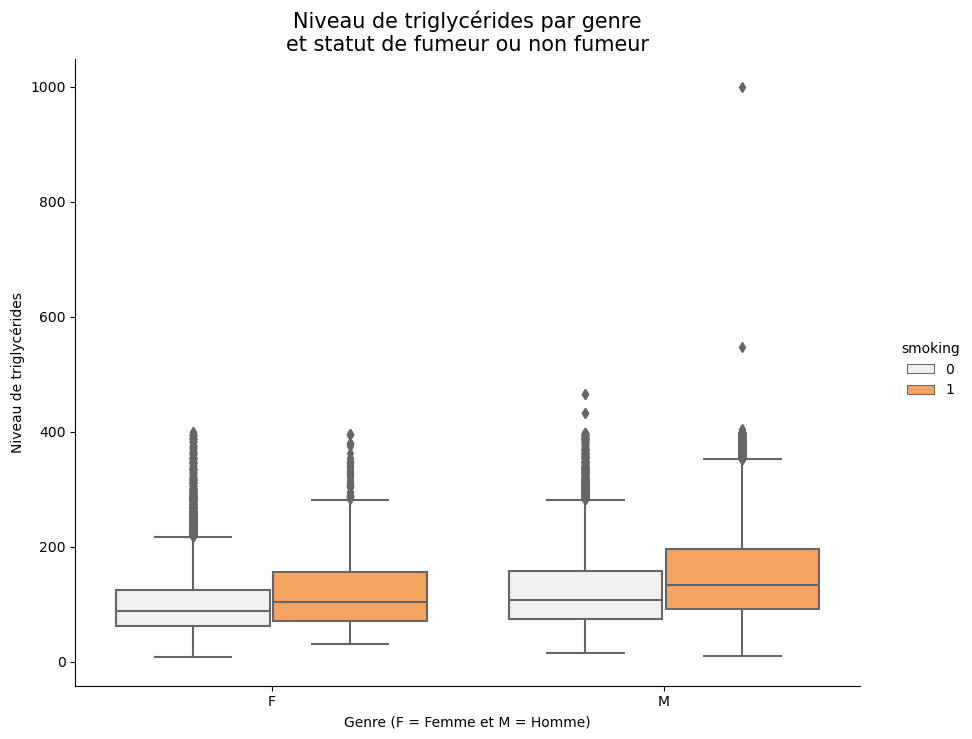

In [190]:
# Look at the variability of the level of triglycerides according to gender and smoking status
sns.catplot(x = "gender",
            y = "triglyceride",
            kind = "box",
            hue = "smoking",
            color = 'sandybrown',
            data = smoking, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True)
plt.xlabel('Genre (F = Femme et M = Homme)')
plt.ylabel('Niveau de triglycérides')
plt.title("Niveau de triglycérides par genre\net statut de fumeur ou non fumeur", fontsize = 15)

Text(0.5, 1.0, "Niveau d'hémoglobine par genre\net statut de fumeur ou non fumeur")

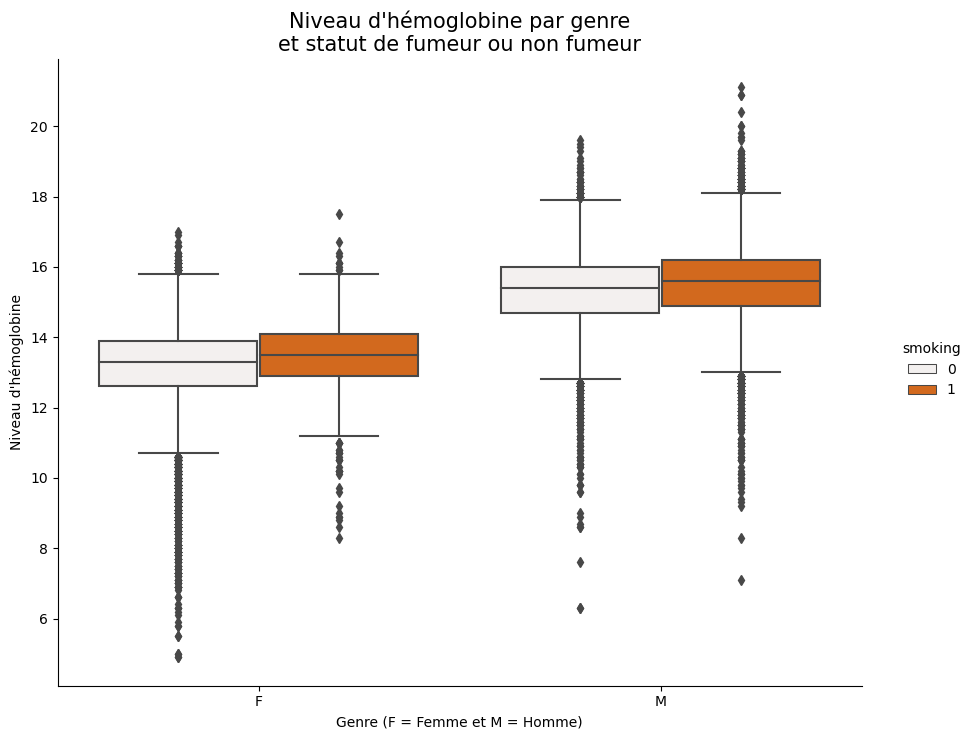

In [191]:
# Look at the variability of hemoglobin level according to gender and smoking status
sns.catplot(x = "gender",
            y = "hemoglobin",
            kind = "box",
            hue = "smoking",
            color = 'chocolate',
            data = smoking, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True)
plt.xlabel('Genre (F = Femme et M = Homme)')
plt.ylabel('Niveau d\'hémoglobine')
plt.title("Niveau d\'hémoglobine par genre\net statut de fumeur ou non fumeur", fontsize = 15)

Text(0.5, 1.0, 'Niveau de cholesterol par genre\net statut de fumeur ou non fumeur')

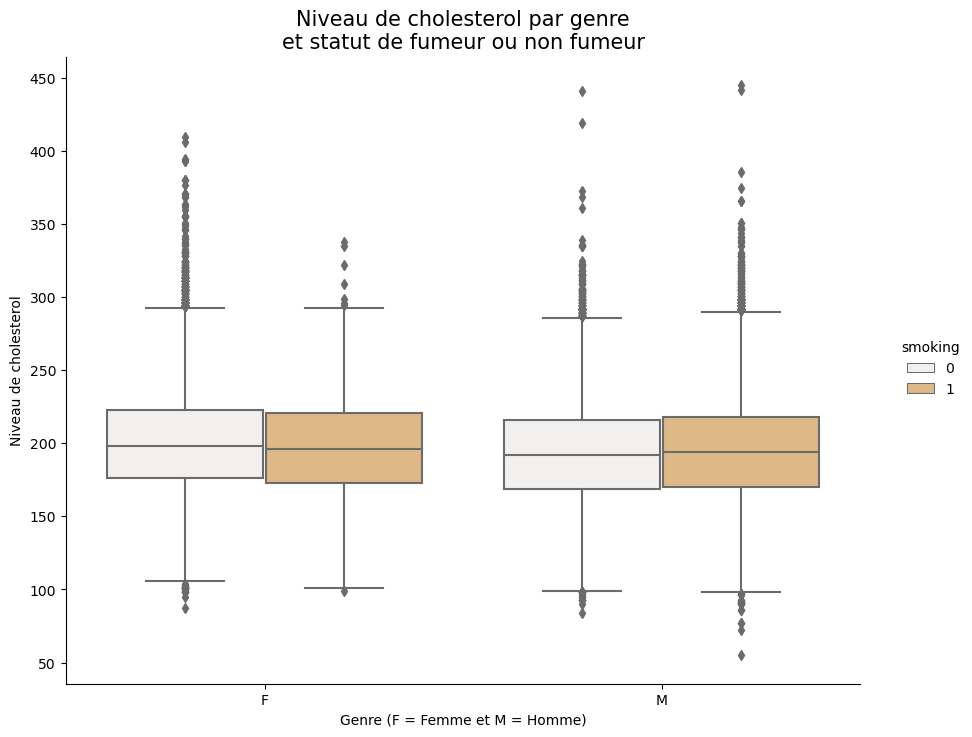

In [192]:
# Look at the variability of hemoglobin level according to gender and smoking status
sns.catplot(x = "gender",
            y = "Cholesterol",
            kind = "box",
            hue = "smoking",
            color = 'burlywood',
            data = smoking, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True)
plt.xlabel('Genre (F = Femme et M = Homme)')
plt.ylabel('Niveau de cholesterol')
plt.title("Niveau de cholesterol par genre\net statut de fumeur ou non fumeur", fontsize = 15)

Text(0.5, 1.0, 'Niveau de serum creatinine par genre et statut de fumeur ou non fumeur')

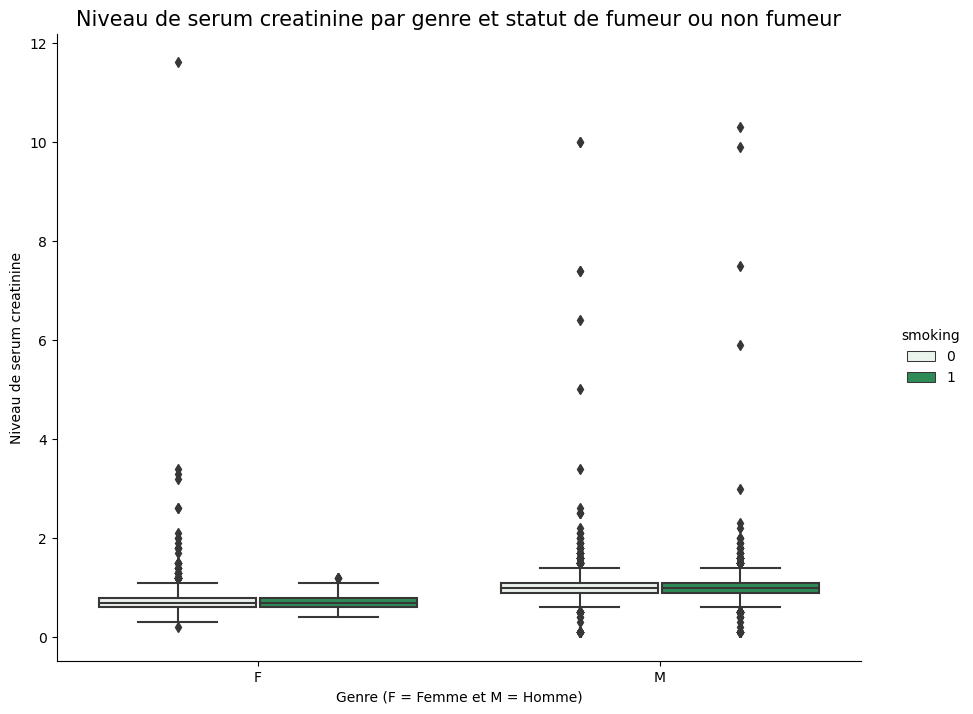

In [193]:
# Look at the variability of the level of serum creatinine depending on the gender and the status of smoker
sns.catplot(x = "gender",
            y = "serum_creatinine",
            kind = "box",
            hue = "smoking",
            color = 'seagreen',
            data = smoking, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True)
plt.xlabel('Genre (F = Femme et M = Homme)')
plt.ylabel('Niveau de serum creatinine')
plt.title("Niveau de serum creatinine par genre et statut de fumeur ou non fumeur", fontsize = 15)

Text(0.5, 1.0, 'Niveau de GTP par genre et statut de fumeur ou non fumeur')

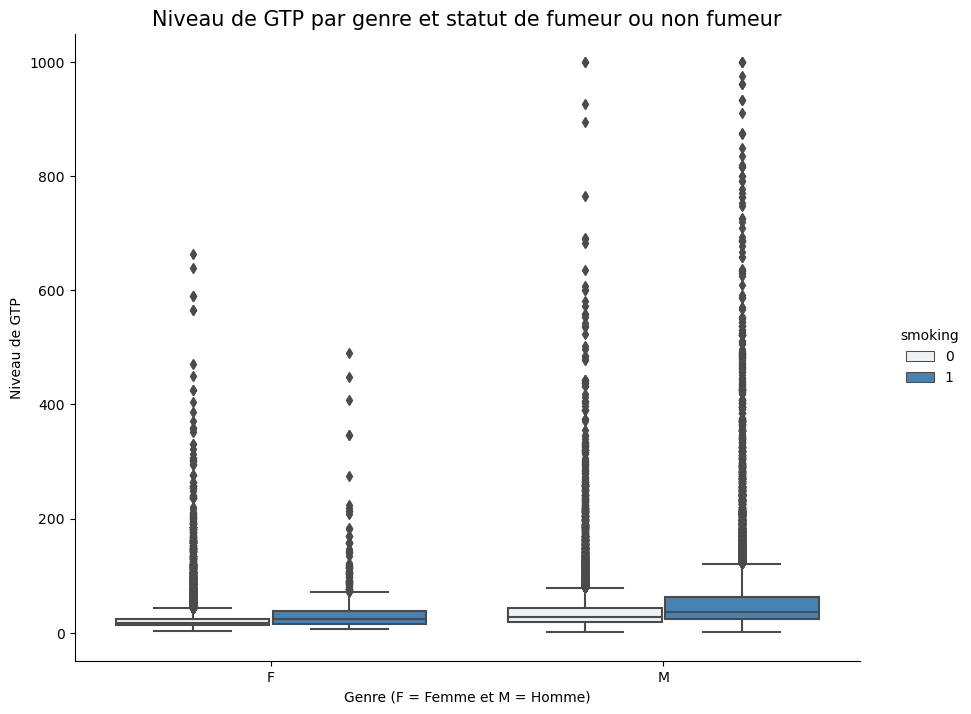

In [194]:
# Look at the variability of the level of GTP according to gender and smoking status
sns.catplot(x = "gender",
            y = "Gtp",
            kind = "box",
            hue = "smoking",
            color = 'steelblue',
            data = smoking, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True)
plt.xlabel('Genre (F = Femme et M = Homme)')
plt.ylabel('Niveau de GTP')
plt.title("Niveau de GTP par genre et statut de fumeur ou non fumeur", fontsize = 15)

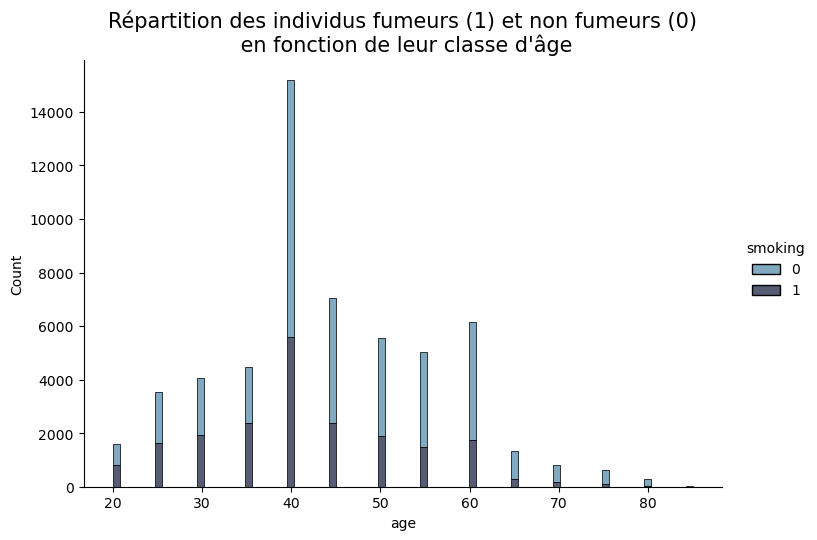

In [195]:
# Relationship between 'age' and 'smoking'
sns.displot(
    data = smoking, x = "age", hue = "smoking",
    kind = "hist", height = 5, aspect = 1.5, multiple = 'stack',
    palette="ch:rot=-.25,hue=1,light=.50")
plt.title("Répartition des individus fumeurs (1) et non fumeurs (0)\n en fonction de leur classe d'âge", fontsize = 15);


Text(0.5, 1.0, "Courbe de densité des variables 'systolic' et 'smoking'")

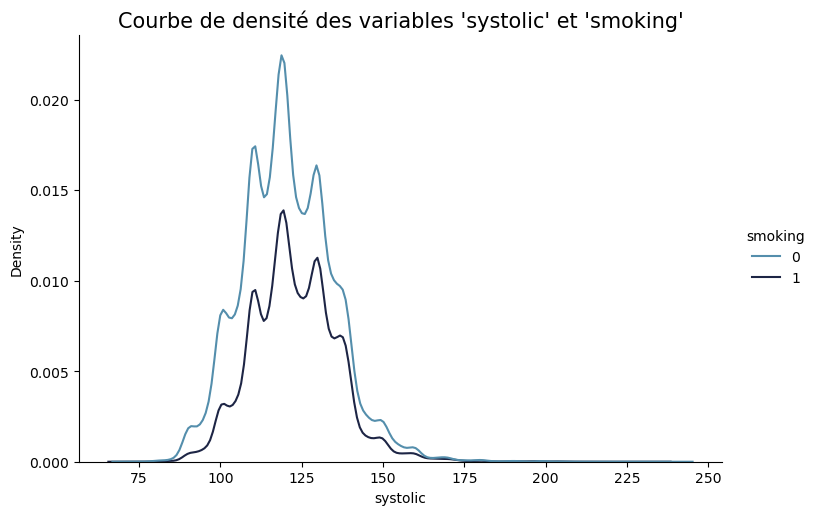

In [196]:
# Density relationship between 'systolic' and 'smoking'
sns.displot(
    data = smoking, x = "systolic", hue = "smoking",
    kind = "kde", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50")
plt.title("Courbe de densité des variables 'systolic' et 'smoking'", fontsize = 15)


Text(0.5, 1.0, "Courbe de densité des variables 'relaxation' et 'smoking'")

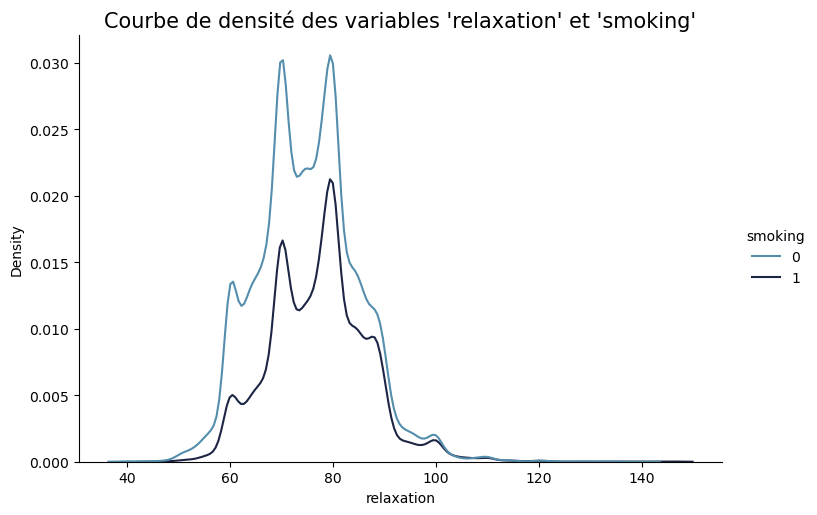

In [197]:
# Density relationship between 'relaxation' and 'smoking'
sns.displot(
    data = smoking, x = "relaxation", hue = "smoking",
    kind = "kde", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50")
plt.title("Courbe de densité des variables 'relaxation' et 'smoking'", fontsize = 15)

Text(0.5, 1.0, "Courbe de densité des variables 'triglyceride' et 'smoking'")

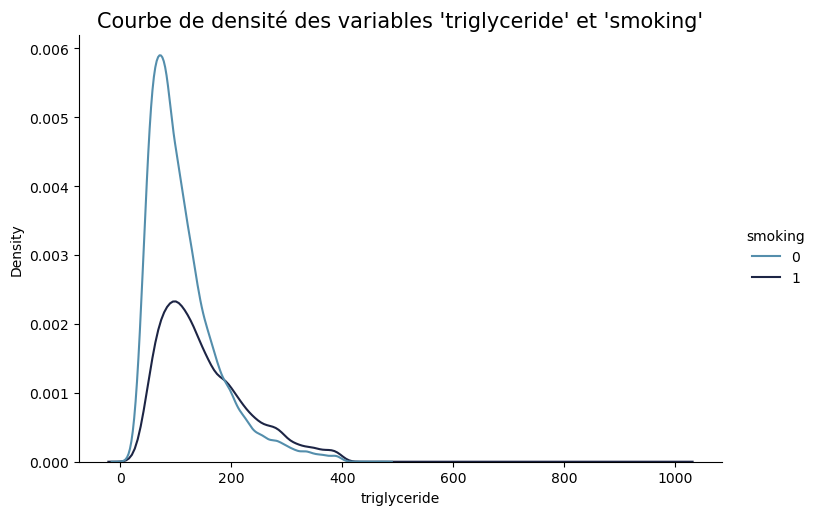

In [198]:
# Density relationship between 'triglyceride' and 'smoking'
sns.displot(
    data = smoking, x = "triglyceride", hue = "smoking",
    kind = "kde", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50")
plt.title("Courbe de densité des variables 'triglyceride' et 'smoking'", fontsize = 15)

Text(0.5, 1.0, "Courbe de densité des variables 'hemoglobin' et 'smoking'")

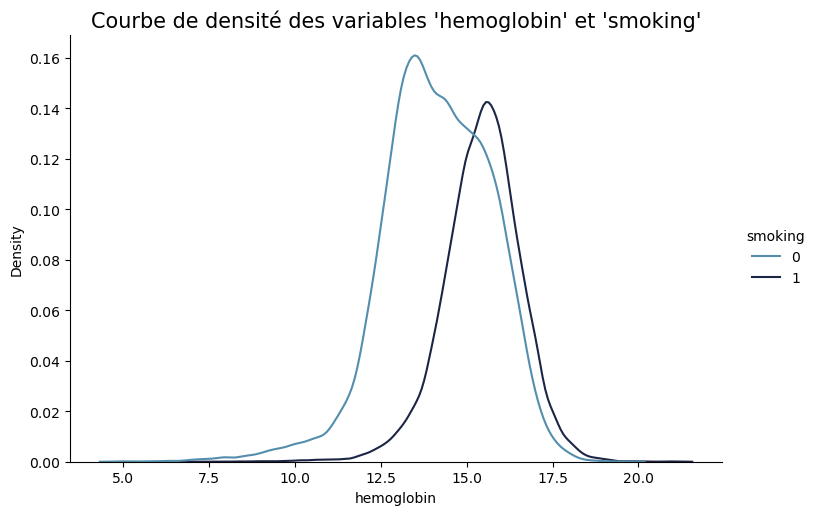

In [199]:
# Density relationship between 'hemoglobin' and 'smoking'
sns.displot(
    data = smoking, x = "hemoglobin", hue = "smoking",
    kind = "kde", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50")
plt.title("Courbe de densité des variables 'hemoglobin' et 'smoking'", fontsize = 15)

Text(0.5, 1.0, "Courbe de densité des variables 'serum creatinine' et 'smoking'")

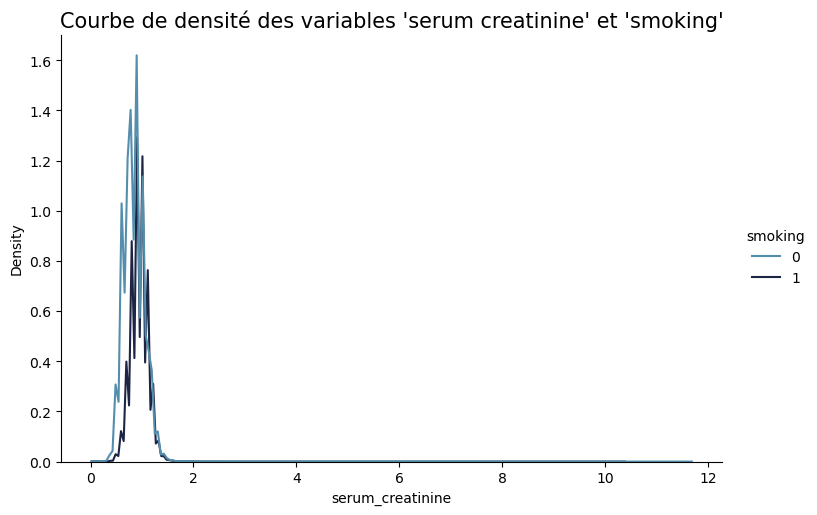

In [200]:
# Density relationship between 'serum creatinine' and 'smoking'
sns.displot(
    data = smoking, x = "serum_creatinine", hue = "smoking",
    kind = "kde", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50")
plt.title("Courbe de densité des variables 'serum creatinine' et 'smoking'", fontsize = 15)

Text(0.5, 1.0, "Courbe de densité des variables 'GTP' et 'smoking'")

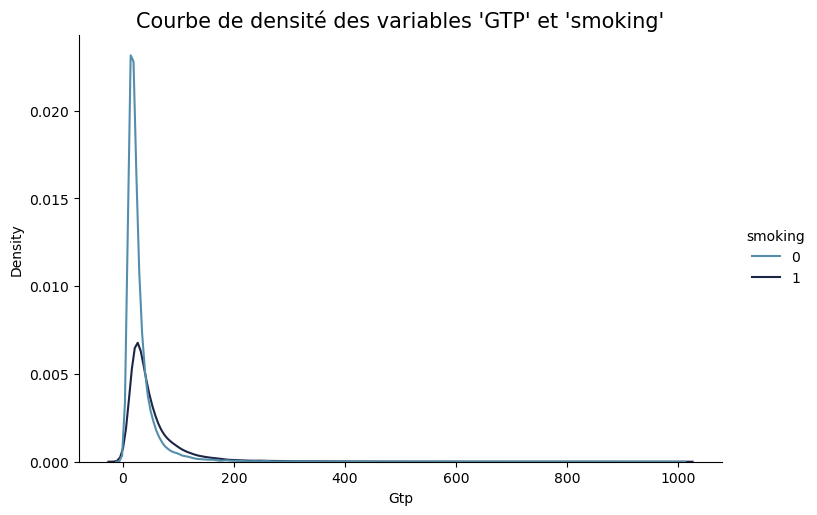

In [201]:
# Density relationship between 'GTP' and 'smoking'
sns.displot(
    data = smoking, x = "Gtp", hue = "smoking",
    kind = "kde", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50")
plt.title("Courbe de densité des variables 'GTP' et 'smoking'", fontsize = 15)

# 4 - Identification and removal of outliers #

In [202]:
# Original dataframe size
print(f"Le jeu de données d'origine fait: {smoking.shape[0]} lignes et {smoking.shape[1]} colonnes.")

Le jeu de données d'origine fait: 55692 lignes et 26 colonnes.


In [203]:
# Definition of the threshold (3 sigma)
zseuil = 3
rows_to_drop = []
test = 0

# Identification of rows with outliers 
for col in smoking.select_dtypes(["float", "int"]).columns:
    
    if col == 'age' or col == 'height_cm' or col == 'weight_kg' or col == 'smoking':
        continue

    zobs = np.abs(stats.zscore(smoking[col]))

    for i in range(len(zobs)):
        if zobs[i] > zseuil:
            rows_to_drop.append(i)

    test = len(rows_to_drop) - test
    print(f'La variable {col} est concernée par {test} valeurs aberrantes')

# Remove duplicate indexes and order them
rows_to_drop = list(set(rows_to_drop))
rows_to_drop.sort()

print(f"{len(rows_to_drop)} valeurs aberrantes (=outliers) sont identifiées")

La variable waist_cm est concernée par 240 valeurs aberrantes
La variable eyesight_left est concernée par 92 valeurs aberrantes
La variable eyesight_right est concernée par 332 valeurs aberrantes
La variable hearing_left est concernée par 1517 valeurs aberrantes
La variable hearing_right est concernée par 1788 valeurs aberrantes
La variable systolic est concernée par 1852 valeurs aberrantes
La variable relaxation est concernée par 2110 valeurs aberrantes
La variable fasting_blood_sugar est concernée par 2844 valeurs aberrantes
La variable Cholesterol est concernée par 2406 valeurs aberrantes
La variable triglyceride est concernée par 3744 valeurs aberrantes
La variable HDL est concernée par 2887 valeurs aberrantes
La variable LDL est concernée par 3840 valeurs aberrantes
La variable hemoglobin est concernée par 3412 valeurs aberrantes
La variable urine_protein est concernée par 5138 valeurs aberrantes
La variable serum_creatinine est concernée par 3553 valeurs aberrantes
La variable AS

In [204]:
# Remove outliers
smoking.drop(smoking.index[rows_to_drop], axis = 0, inplace = True)

print(f"Le jeu de données nettoyé fait: {smoking.shape[0]} lignes et {smoking.shape[1]} colonnes.")

Le jeu de données nettoyé fait: 47716 lignes et 26 colonnes.


In [205]:
# Remove oral examination column (not informative: Yes at 100%)
smoking.drop('oral', axis = 1, inplace = True)

print(f"Le jeu de données nettoyé fait: {smoking.shape[0]} lignes et {smoking.shape[1]} colonnes.")

Le jeu de données nettoyé fait: 47716 lignes et 25 colonnes.


In [206]:
# Describe new basics statistics of the dataframe
smoking.describe(include = 'all')

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,LDL,hemoglobin,urine_protein,serum_creatinine,AST,ALT,Gtp,dental_caries,tartar,smoking
count,47716,47716.000000,47716.000000,47716.000000,47716.000000,47716.000000,47716.000000,47716.0,47716.0,47716.000000,...,47716.000000,47716.000000,47716.000000,47716.000000,47716.000000,47716.000000,47716.000000,47716.000000,47716,47716.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN
freq,30189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26640,NaN
mean,NaN,43.425371,164.800172,65.603466,81.590068,1.008806,1.003644,1.0,1.0,120.611744,...,114.798328,14.645446,1.031667,0.882742,24.475061,24.767311,33.850847,0.213618,NaN,0.359188
std,NaN,11.756921,9.194385,12.423040,8.926422,0.324481,0.322189,0.0,0.0,12.749760,...,31.852873,1.454500,0.175113,0.185642,8.605705,15.046318,27.313856,0.409865,NaN,0.479767
min,NaN,20.000000,130.000000,30.000000,55.000000,0.100000,0.100000,1.0,1.0,81.000000,...,1.000000,10.000000,1.000000,0.300000,6.000000,1.000000,3.000000,0.000000,NaN,0.000000
25%,NaN,35.000000,160.000000,55.000000,75.200000,0.800000,0.800000,1.0,1.0,111.000000,...,93.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,NaN,0.000000
50%,NaN,40.000000,165.000000,65.000000,81.300000,1.000000,1.000000,1.0,1.0,120.000000,...,113.000000,14.800000,1.000000,0.900000,23.000000,20.000000,24.000000,0.000000,NaN,0.000000
75%,NaN,50.000000,170.000000,75.000000,87.500000,1.200000,1.200000,1.0,1.0,130.000000,...,136.000000,15.700000,1.000000,1.000000,28.000000,29.000000,40.000000,0.000000,NaN,1.000000


# 5 - PRE-PROCESSING DES DONNEES #

## Separate target from feature variables ##

In [207]:
# Separate target variable Y from features X
print("Separating labels from features...")

features_list = smoking.columns[0:-1]

X = smoking.loc[:,features_list]
y = smoking.loc[:,"smoking"]

print("...Done.")

Separating labels from features...
...Done.


## Train / Test split ##

In [208]:
# Divide dataset Train set & Test set 
print("Splitting dataset into train set and test set...")

## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0, 
                                                    stratify = y)

print("...Done.")

Splitting dataset into train set and test set...
...Done.


## Encode categorical variables and standardize numerical features ##

In [209]:
# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")
print()

# Define columns with numeric features to standardize
numeric_features = list(range(1, 23, 1))
numeric_transformer = StandardScaler()

# Define columns with categorical features to standardize
categorical_features = [0, 23]
categorical_transformer = OneHotEncoder()

# Define your transformation fonction
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

# Transform your X train
X_train = feature_encoder.fit_transform(X_train)
print("...Done for X_train.")
print(X_train[:5])
print()

# Transform you X test
X_test = feature_encoder.transform(X_test)
print("...Done for X_test.")
print(X_test[:5])
print()

Encoding categorical features and standardizing numerical features...

...Done for X_train.
[[ 1.          0.          0.          1.         -0.28713658  0.01756705
  -0.85735054 -1.41469277 -1.57055176 -1.24977115  0.          0.
  -0.83152043 -0.600904    0.47430308  0.0894279  -1.37799213  0.49739259
   0.41556167 -0.51657906 -0.18285324 -0.98529177 -1.21949578 -1.18239325
  -0.87395594  1.91317455]
 [ 0.          1.          0.          1.         -1.99001511 -0.5276113
  -1.25948842 -0.96541713  0.58778164  0.61253024  0.          0.
  -0.04823412 -0.600904   -1.27684279  1.74345067  1.15459565 -0.53113487
   1.63825051  1.54835234 -0.18285324  0.09054048  1.45549813  2.539575
   0.37461797  1.91317455]
 [ 1.          0.          1.          0.          0.56430268  0.01756705
   0.3490631  -0.51614148 -1.57055176 -1.56015471  0.          0.
   0.65672356 -0.92945541 -1.27684279 -0.66503863 -0.71731706  1.30552131
  -0.99523314 -1.27372057 -0.18285324 -0.98529177  0.64136955 -0.31

# 6 - MACHINE LEARNING : LOGICAL REGRESSION #

## Train your model and test it ##

In [236]:
# Training model 
print("Training model...")
classifier = LogisticRegression(random_state = 0) # Instanciate model 
classifier.fit(X_train, y_train) # Fit model
print("...Done.")

Training model...
...Done.


In [237]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

print("First five predictions on TRAIN set :")
print(y_train_pred[0:5])

Predictions on train set...
...Done.

First five predictions on TRAIN set :
[0 1 0 0 1]


In [238]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

print("First five predictions on TEST set :")
print(y_test_pred[0:5])

Predictions on test set...
...Done.

First five predictions on TEST set :
[1 0 0 0 0]


## Evaluate your model ##

--- Assessment of performances of logical regression approach ---


c:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


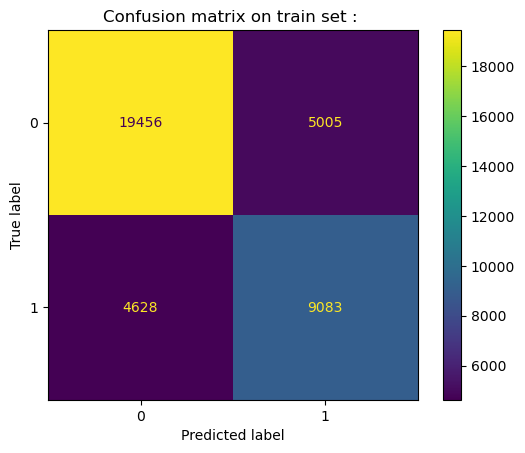

Accuracy-score on train set :  0.747642250864508
F1 score on train set :  0.6534767437677615


c:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


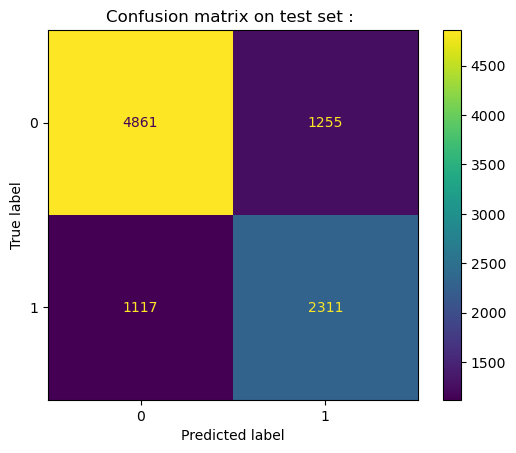

Accuracy-score on test set :  0.7514668901927913
F1 score on train set :  0.6608521589934229


In [240]:
### Assessment of performances ###
print("--- Assessment of performances of logical regression approach ---")

# Plot confusion matrix for training set
cm = plot_confusion_matrix(classifier, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set : ")
plt.show()
print("Accuracy-score on train set : ", classifier.score(X_train, y_train))
print("F1 score on train set : ", f1_score(y_train, y_train_pred))

# Plot confusion matrix for test set
cm = plot_confusion_matrix(classifier, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set : ")
plt.show()
print("Accuracy-score on test set : ", classifier.score(X_test, y_test))
print("F1 score on test set : ", f1_score(y_test, y_test_pred))

## Look at the coefficients ##

In [214]:
print("Here are some informations about your logical regression model : \n\n")

# Check coefficients 
print("Coefficients are: ", classifier.coef_) 
print("Constant is: ", classifier.intercept_)

# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])

# Print categories
categorical_column_names = feature_encoder.transformers_[0][1].categories_
print("Categorical columns are: ", categorical_column_names)

# Print numerical columns
numerical_column_names = X.iloc[:, numeric_features].columns
print("numerical columns are: ", numerical_column_names)

# Append all columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)
print("All column names are: ",all_column_names)

# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":classifier.coef_.squeeze()
})

print("\nHere is a summary table with coefficient associated to each variable :")
feature_importance

Here are some informations about your logical regression model : 


Coefficients are:  [[-1.46615613  1.46103273 -0.17901904  0.17389564  0.01758373  0.19998246
  -0.10961869 -0.03468892 -0.03732492  0.03526114  0.          0.
  -0.1898942   0.06893731  0.02767083 -0.0826176   0.28582169 -0.01827347
  -0.02326471  0.2176983  -0.03078857 -0.21302283 -0.03269243 -0.1824896
   0.4410091   0.14313674]]
Constant is:  [-1.47655064]
All transformers are:  [('cat', OneHotEncoder(), [0, 23]), ('num', StandardScaler(), [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])]
One Hot Encoder transformer is:  OneHotEncoder()
Categorical columns are:  [array(['F', 'M'], dtype=object), array(['N', 'Y'], dtype=object)]
numerical columns are:  Index(['age', 'height_cm', 'weight_kg', 'waist_cm', 'eyesight_left',
       'eyesight_right', 'hearing_left', 'hearing_right', 'systolic',
       'relaxation', 'fasting_blood_sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'h

,feature_names,coefficients
0,F,-1.466156
1,M,1.461033
2,N,-0.179019
3,Y,0.173896
4,age,0.017584
5,height_cm,0.199982
6,weight_kg,-0.109619
7,waist_cm,-0.034689
8,eyesight_left,-0.037325
9,eyesight_right,0.035261


Let's visualize the importance of each variable : 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'M'),
  Text(1, 0, 'Gtp'),
  Text(2, 0, 'triglyceride'),
  Text(3, 0, 'hemoglobin'),
  Text(4, 0, 'height_cm'),
  Text(5, 0, 'Y'),
  Text(6, 0, 'dental_caries'),
  Text(7, 0, 'relaxation'),
  Text(8, 0, 'eyesight_right'),
  Text(9, 0, 'fasting_blood_sugar'),
  Text(10, 0, 'age'),
  Text(11, 0, 'hearing_left'),
  Text(12, 0, 'hearing_right'),
  Text(13, 0, 'HDL'),
  Text(14, 0, 'LDL'),
  Text(15, 0, 'urine_protein'),
  Text(16, 0, 'AST'),
  Text(17, 0, 'waist_cm'),
  Text(18, 0, 'eyesight_left'),
  Text(19, 0, 'Cholesterol'),
  Text(20, 0, 'weight_kg'),
  Text(21, 0, 'N'),
  Text(22, 0, 'ALT'),
  Text(23, 0, 'systolic'),
  Text(24, 0, 'serum_creatinine'),
  Text(25, 0, 'F')])

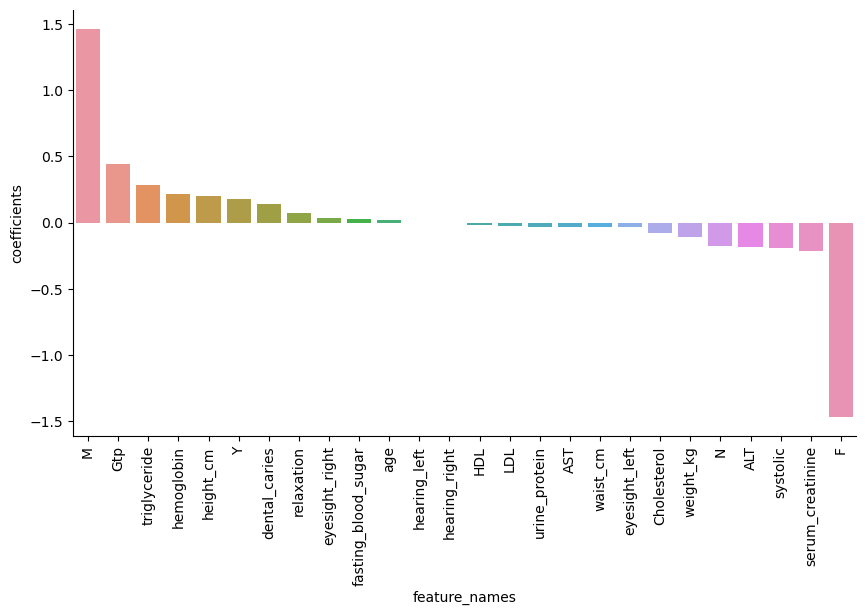

In [215]:
print("Let's visualize the importance of each variable : ")

# Set coefficient to absolute values to rank features
#feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x = "feature_names", 
            y = "coefficients", 
            data = feature_importance.sort_values(by="coefficients", ascending=False), 
            kind = "bar",
            aspect=16/9)
plt.xticks(rotation=90)

# 7 - MACHINE LEARNING : DECISION TREE #

## Train your model and test it ##

In [241]:
# Training model
print("Training model...")
classifier_tree = DecisionTreeClassifier()
classifier_tree.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [242]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier_tree.predict(X_train)
print("...Done.")
print()

print("First five predictions on TRAIN set :")
print(y_train_pred[0:5])

Predictions on train set...
...Done.

First five predictions on TRAIN set :
[0 0 0 0 1]


In [243]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier_tree.predict(X_test)
print("...Done.")
print()

print("First five predictions on TEST set :")
print(y_test_pred[0:5])

Predictions on test set...
...Done.

First five predictions on TEST set :
[1 0 0 1 0]


## Evaluate your model ##

--- Assessment of performances of the decisien tree ---


c:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


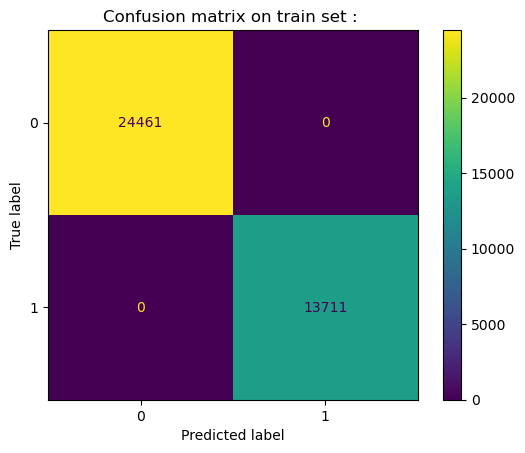

Accuracy-score on train set :  1.0
F1 score on train set :  1.0


c:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


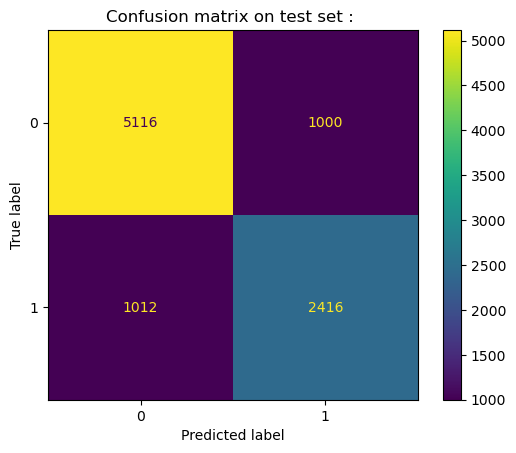

Accuracy-score on test set :  0.78918692372171
F1 score on train set :  0.706019871420222


In [244]:
### Assessment of performances ###
print("--- Assessment of performances of the decisien tree ---")

# Plot confusion matrix for training set
cm = plot_confusion_matrix(classifier_tree, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set : ")
plt.show()
print("Accuracy-score on train set : ", classifier_tree.score(X_train, y_train))
print("F1 score on train set : ", f1_score(y_train, y_train_pred))

# Plot confusion matrix for test set
cm = plot_confusion_matrix(classifier_tree, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set : ")
plt.show()
print("Accuracy-score on test set : ", classifier_tree.score(X_test, y_test))
print("F1 score on test set : ", f1_score(y_test, y_test_pred))

Based on these results, we observe overfitting (accuracy = 1 on the training test)
Let's try to improve our results

## Train your model v2 and test it ##

In [245]:
# Training model
print("Training model...")
classifier_tree2 = DecisionTreeClassifier(min_samples_split=80, class_weight="balanced")
classifier_tree2.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [246]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier_tree2.predict(X_train)
print("...Done.")
print()

print("First five predictions on TRAIN set :")
print(y_train_pred[0:5])

Predictions on train set...
...Done.

First five predictions on TRAIN set :
[0 1 0 0 1]


In [247]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier_tree2.predict(X_test)
print("...Done.")
print()

print("First five predictions on TEST set :")
print(y_test_pred[0:5])

Predictions on test set...
...Done.

First five predictions on TEST set :
[1 0 0 0 0]


## Evaluate your model ##

--- Assessment of performances of the decision tree v2 ---


c:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


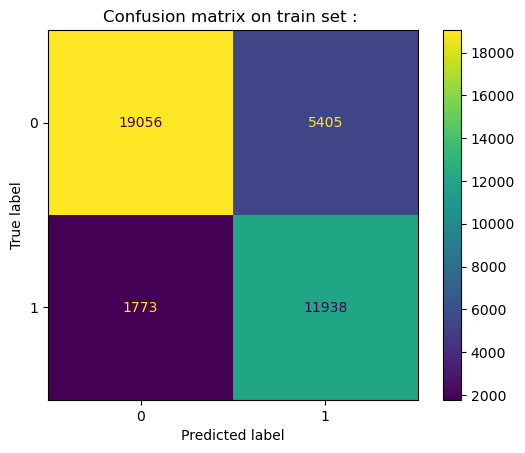

Accuracy-score on train set :  0.811956407838206
F1 score on train set :  0.7688542538803375


c:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


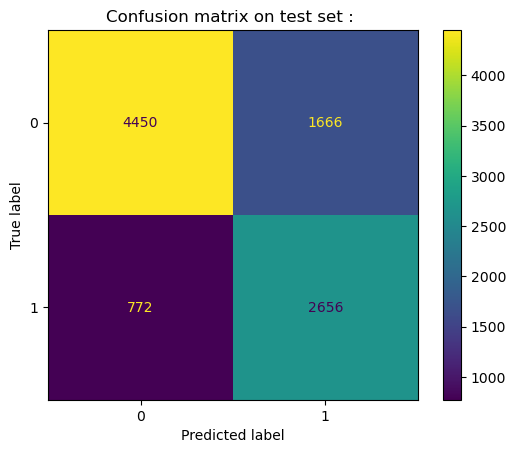

Accuracy-score on test set :  0.7445515507124896
F1 score on train set :  0.6854193548387097


In [248]:
### Assessment of performances ###
print("--- Assessment of performances of the decision tree v2 ---")

# Plot confusion matrix for training set
cm = plot_confusion_matrix(classifier_tree2, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set : ")
plt.show()
print("Accuracy-score on train set : ", classifier_tree2.score(X_train, y_train))
print("F1 score on train set : ", f1_score(y_train, y_train_pred))

# Plot confusion matrix for test set
cm = plot_confusion_matrix(classifier_tree2, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set : ")
plt.show()
print("Accuracy-score on test set : ", classifier_tree2.score(X_test, y_test))
print("F1 score on test set : ", f1_score(y_test, y_test_pred))

## Look at the coefficients ##

In [224]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":classifier_tree2.feature_importances_ # CAREFUL HERE. We need to access first index of our list because 
                                            # Data need to be 1 dimensional
                                            # That's what .squeeze()
})

print("\nHere is a summary table with coefficient associated to each variable :")
feature_importance


Here is a summary table with coefficient associated to each variable :


,feature_names,coefficients
0,F,0.000000
1,M,0.586950
2,N,0.001081
3,Y,0.006388
4,age,0.022806
5,height_cm,0.006065
6,weight_kg,0.012565
7,waist_cm,0.024361
8,eyesight_left,0.008325
9,eyesight_right,0.007458


Let's visualize the importance of each variable : 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'M'),
  Text(1, 0, 'Gtp'),
  Text(2, 0, 'triglyceride'),
  Text(3, 0, 'ALT'),
  Text(4, 0, 'LDL'),
  Text(5, 0, 'HDL'),
  Text(6, 0, 'waist_cm'),
  Text(7, 0, 'age'),
  Text(8, 0, 'Cholesterol'),
  Text(9, 0, 'systolic'),
  Text(10, 0, 'AST'),
  Text(11, 0, 'fasting_blood_sugar'),
  Text(12, 0, 'hemoglobin'),
  Text(13, 0, 'serum_creatinine'),
  Text(14, 0, 'relaxation'),
  Text(15, 0, 'weight_kg'),
  Text(16, 0, 'eyesight_left'),
  Text(17, 0, 'eyesight_right'),
  Text(18, 0, 'Y'),
  Text(19, 0, 'height_cm'),
  Text(20, 0, 'dental_caries'),
  Text(21, 0, 'urine_protein'),
  Text(22, 0, 'N'),
  Text(23, 0, 'hearing_right'),
  Text(24, 0, 'hearing_left'),
  Text(25, 0, 'F')])

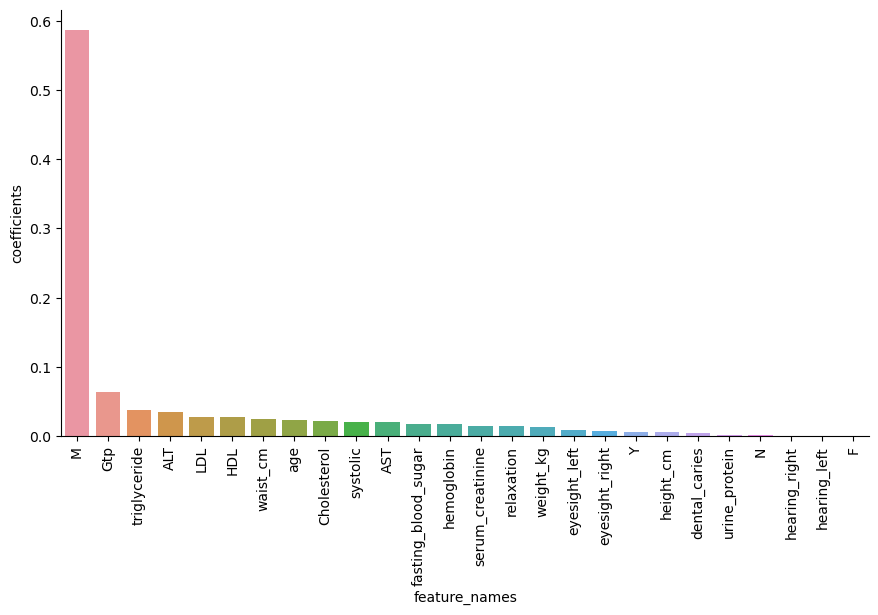

In [225]:
print("Let's visualize the importance of each variable : ")

# Set coefficient to absolute values to rank features
#feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x = "feature_names", 
            y = "coefficients", 
            data = feature_importance.sort_values(by="coefficients", ascending=False), 
            kind = "bar",
            aspect=16/9)
plt.xticks(rotation=90)

# 8 - MACHINE LEARNING : RANDOM FOREST #

## Train your model and test it ##

In [265]:
# Training model
print("Training model...")
classifier_forest = RandomForestClassifier()
classifier_forest.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [266]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier_forest.predict(X_train)
print("...Done.")
print()

print("First five predictions on TRAIN set :")
print(y_train_pred[0:5])

Predictions on train set...
...Done.

First five predictions on TRAIN set :
[0 0 0 0 1]


In [267]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred = classifier_forest.predict(X_test)
print("...Done.")
print()

print("First five predictions on TEST set :")
print(y_test_pred[0:5])

Predictions on test set...
...Done.

First five predictions on TEST set :
[1 0 0 0 0]


## Evaluate your model ##

--- Assessment of performances of random forest ---


c:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


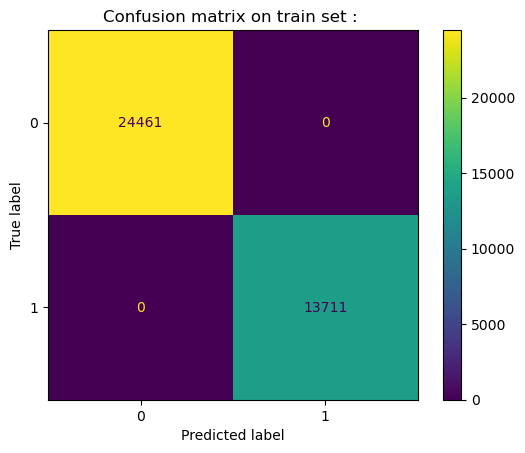

Accuracy-score on train set :  1.0
F1 score on train set :  1.0


c:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


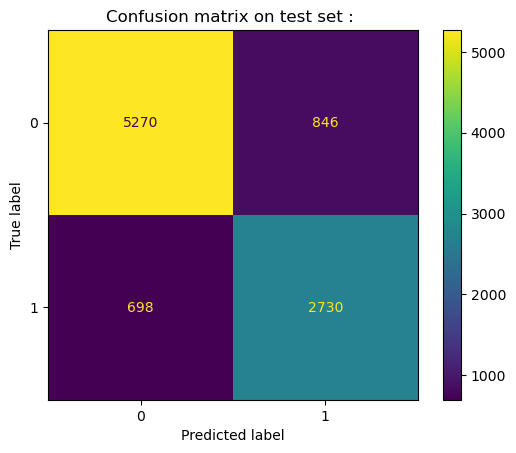

Accuracy-score on test set :  0.8382229673093042
F1 score on test set :  0.7795545402627071


In [268]:
### Assessment of performances ###
print("--- Assessment of performances of random forest ---")

# Plot confusion matrix for training set
cm = plot_confusion_matrix(classifier_forest, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set : ")
plt.show()
print("Accuracy-score on train set : ", classifier_forest.score(X_train, y_train))
print("F1 score on train set : ", f1_score(y_train, y_train_pred))

# Plot confusion matrix for test set
cm = plot_confusion_matrix(classifier_forest, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set : ")
plt.show()
print("Accuracy-score on test set : ", classifier_forest.score(X_test, y_test))
print("F1 score on test set : ", f1_score(y_test, y_test_pred))

## Look at the coefficients ##

In [269]:
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifier_forest.feature_importances_
                                        
})

print("\nHere is a summary table with coefficient associated to each variable :")
feature_importance


Here is a summary table with coefficient associated to each variable :


,feature_names,coefficients
0,F,0.073911
1,M,0.092108
2,N,0.005250
3,Y,0.005054
4,age,0.033966
5,height_cm,0.044198
6,weight_kg,0.035372
7,waist_cm,0.047828
8,eyesight_left,0.026026
9,eyesight_right,0.025113


Let's visualize the importance of each variable : 


Text(0.5, 1.0, "Visualisation de l'importance des variables\ndans le modèle de RandomForest")

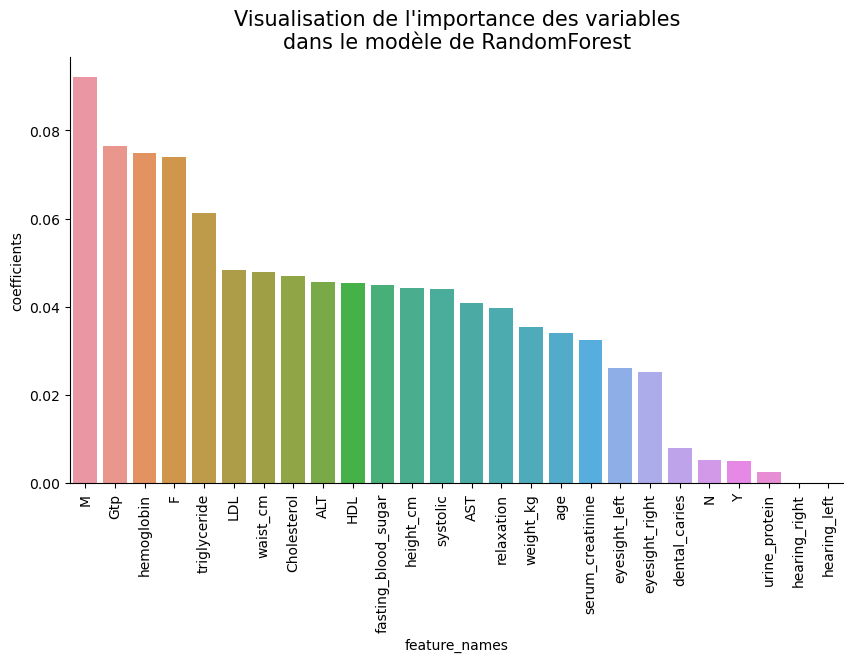

In [270]:
print("Let's visualize the importance of each variable : ")

# Set coefficient to absolute values to rank features
#feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x = "feature_names", 
            y = "coefficients", 
            data = feature_importance.sort_values(by="coefficients", ascending=False), 
            kind = "bar",
            aspect=16/9)
plt.xticks(rotation=90)
plt.title("Visualisation de l'importance des variables\ndans le modèle de RandomForest", fontsize = 15)

## Overfitting -> Try other parameters ##

## Train your model and test it ##

In [271]:
# Training model
print("Training model...")
classifier_forest = RandomForestClassifier(min_samples_split=80, class_weight="balanced")
classifier_forest.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [272]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier_forest.predict(X_train)
print("...Done.")
print()

print("First five predictions on TRAIN set :")
print(y_train_pred[0:5])

Predictions on train set...
...Done.

First five predictions on TRAIN set :
[0 1 0 0 1]


In [273]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred = classifier_forest.predict(X_test)
print("...Done.")
print()

print("First five predictions on TEST set :")
print(y_test_pred[0:5])

Predictions on test set...
...Done.

First five predictions on TEST set :
[1 0 0 0 0]


## Evaluate your model ##

--- Assessment of performances of random forest ---


c:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


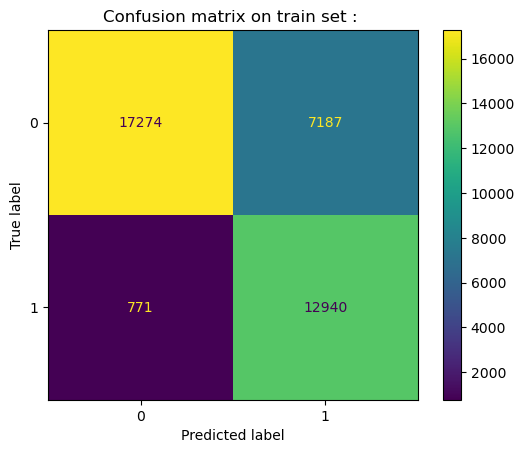

Accuracy-score on train set :  0.7915225819972755
F1 score on train set :  0.7648206158756428


c:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


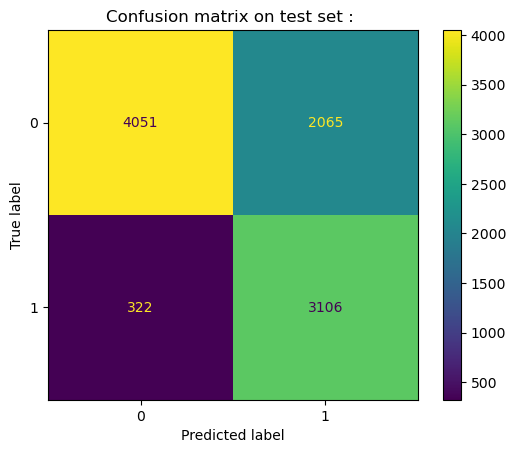

Accuracy-score on test set :  0.7498952221290863
F1 score on test set :  0.7224095825095942


In [274]:
### Assessment of performances ###
print("--- Assessment of performances of random forest ---")

# Plot confusion matrix for training set
cm = plot_confusion_matrix(classifier_forest, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set : ")
plt.show()
print("Accuracy-score on train set : ", classifier_forest.score(X_train, y_train))
print("F1 score on train set : ", f1_score(y_train, y_train_pred))

# Plot confusion matrix for test set
cm = plot_confusion_matrix(classifier_forest, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set : ")
plt.show()
print("Accuracy-score on test set : ", classifier_forest.score(X_test, y_test))
print("F1 score on test set : ", f1_score(y_test, y_test_pred))

## Look at the coefficients ##

In [275]:
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifier_forest.feature_importances_
                                        
})

print("\nHere is a summary table with coefficient associated to each variable :")
feature_importance


Here is a summary table with coefficient associated to each variable :


,feature_names,coefficients
0,F,0.148712
1,M,0.246146
2,N,0.005326
3,Y,0.004712
4,age,0.028975
5,height_cm,0.076915
6,weight_kg,0.034930
7,waist_cm,0.028135
8,eyesight_left,0.008115
9,eyesight_right,0.008177


Let's visualize the importance of each variable : 


Text(0.5, 1.0, "Visualisation de l'importance des variables\ndans le modèle de RandomForest")

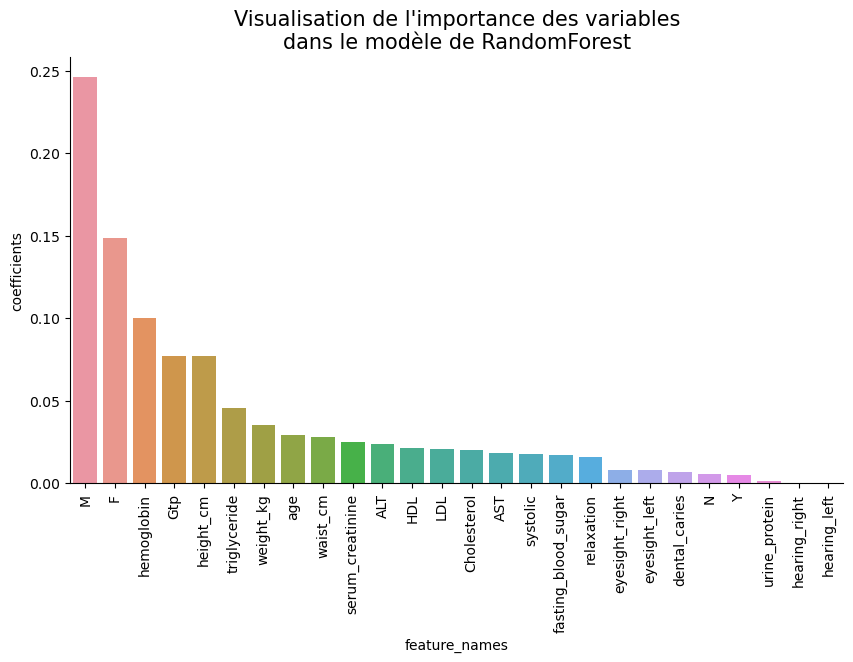

In [276]:
print("Let's visualize the importance of each variable : ")

# Set coefficient to absolute values to rank features
#feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x = "feature_names", 
            y = "coefficients", 
            data = feature_importance.sort_values(by="coefficients", ascending=False), 
            kind = "bar",
            aspect=16/9)
plt.xticks(rotation=90)
plt.title("Visualisation de l'importance des variables\ndans le modèle de RandomForest", fontsize = 15)